In [2]:
import pandas as pd
import pandas as pd
maternal_h = pd.read_csv("Maternal Health Risk Data Set.csv")

maternal_h.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
maternal_h.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [4]:
maternal_h.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
maternal_h['SystolicBP'].mean()

113.19822485207101

In [7]:
maternal_h.mean()

Age             29.871795
SystolicBP     113.198225
DiastolicBP     76.460552
BS               8.725986
BodyTemp        98.665089
HeartRate       74.301775
dtype: float64

In [25]:
print(maternal_h.RiskLevel.value_counts())
maternal_h.describe() 

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


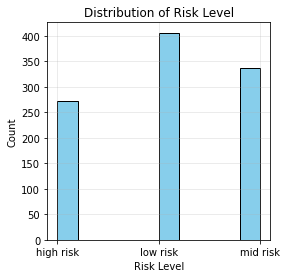

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.hist(maternal_h['RiskLevel'], color='skyblue', edgecolor='black')
plt.title('Distribution of Risk Level')
plt.ylabel('Count')
plt.xlabel('Risk Level')
plt.grid(True, alpha=0.3)
plt.show()

The dataset contains 1014 instances with 7 attributes, including a class attribute (low, medium and high risk).  the Plot shows an uneven distribution of the class data; this might call for a synthetic filling of the data (oversampling) to create a more balanced class. (The high risk class datapoints seems sufficient, we might not need to SMOTE the data)

Minimum heart rate value of 7 is not medically plausible resulting in low risk, this can be visibly seen an 'Outlier' in the  sns plot below for heart rate and bodytemp. we either take that out from the dataset or replace it with a mean heartrate value; which is the best option. 

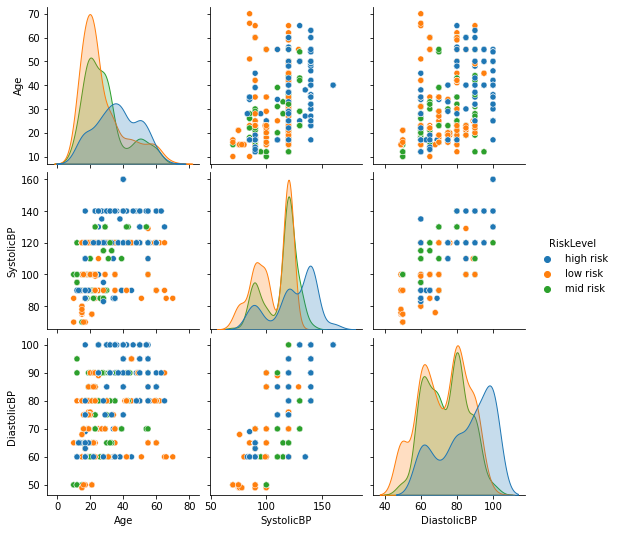

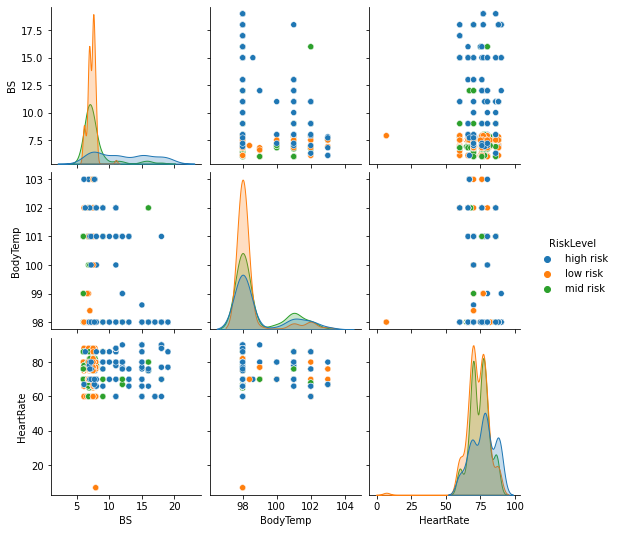

In [7]:
import seaborn as sns
grid = sns.pairplot(data=maternal_h, vars=maternal_h.columns[0:3], hue='RiskLevel')

grid = sns.pairplot(data=maternal_h, vars=maternal_h.columns[3:6], hue='RiskLevel')

we use the plots above to  visualize relationships between variables., we see that the risk levels are not clearly seperated; this might make it hard for machine learning models to easily seperate the risk levels using the provided features. Blood sugar (BS) of above 10 mmol/L has strong relationship with risk level, with little input from other variables on risk level. its also a variable that could be easily predicted by ML due to it's seperability from other variables.  

We would also have to convert our risk levels into ordinal numbers (0,1 and 2), using Either ordinal encoder or mapping. This would help the ml work seamlessly. I believe our risk class is an ordinal predictor/category. (but correct me if i'm wrong)

In [2]:
# Define your custom mapping as a dictionary (assumes your categories are category1 , et. )
mapping = {'high risk': 2, 'mid risk': 1, 'low risk': 0}

# Apply the mapping to your column (assumes "column_to_encocde" is the name of your column and df is the name of your dataframe)
maternal_h['RiskLevel'] = maternal_h['RiskLevel'].map(mapping)

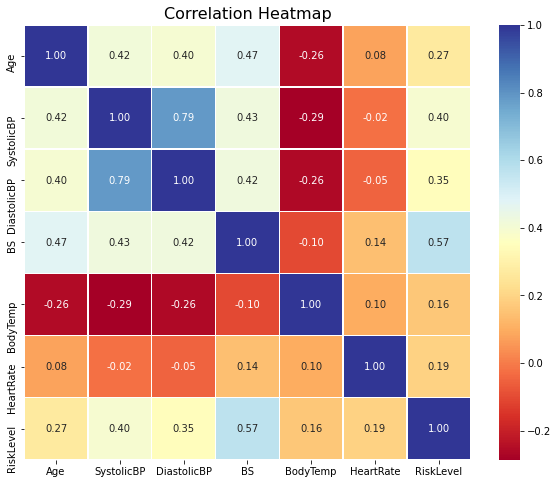

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming maternal_h is your DataFrame
corr = maternal_h.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlBu', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()

##### Goals.

Compare prediction accuracy of multiple algorithms, using stacking for a meta ML. Metrics to Include precision, recall, F1.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import ParameterGrid

from tensorflow import keras
from keras import layers
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from keras.layers import Dense, Flatten, Reshape
from keras.models import Sequential

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#import tensorflow_addons as tfa

In [4]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split,  GridSearchCV, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

#from xgboost import XGBRegressor

#### Training, Test split and preprocessing

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(maternal_h.drop(columns = ['RiskLevel']),
                                                              maternal_h['RiskLevel'], stratify= maternal_h['RiskLevel'],test_size=0.2)


X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, stratify=y_train_full)

print("Training set shape:", X_train.shape, y_train.shape) #maternal_h.drop(column = ['RiskLevel']
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (608, 6) (608,)
Test set shape: (203, 6) (203,)


In [6]:
X_test

sc = StandardScaler()
X_train_full_std = sc.fit_transform(X_train_full)
X_val
X_val_std = sc.fit_transform(X_val)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
print("Training set shape:", X_train_std.shape, y_train.shape) #maternal_h.drop(column = ['RiskLevel']
print("Test set shape:", X_test_std.shape, y_test.shape)

print("X_train_std shape:", X_train_std.shape)
print("y_train shape:", y_train.shape)
print("X_val_std shape:", X_val_std.shape)
print("y_val shape:", y_val.shape)
print("X_test_std shape:", X_test_std.shape)
print("y_test shape:", y_test.shape)


Training set shape: (608, 6) (608,)
Test set shape: (203, 6) (203,)
X_train_std shape: (608, 6)
y_train shape: (608,)
X_val_std shape: (203, 6)
y_val shape: (203,)
X_test_std shape: (203, 6)
y_test shape: (203,)


##### check for multicolinearity

In [51]:
corr = maternal_h.corr()

evals, evecs = np.linalg.eig(corr)

print('eigenvalue:',  evals)
print('eigenvectors:',  evecs)

# Find the conditioning number
condition_number = max(evals) / min(evals)
print("Condition Number:", condition_number)

# Interpret results
if condition_number > 30:
    print("Multicollinearity is severe.")
elif condition_number > 10:
    print("Multicollinearity is moderate.")
else:
    print("Multicollinearity is low.")

eigenvalue: [2.8926106  1.37720137 0.9207251  0.7095547  0.53914698 0.3553577
 0.20540355]
eigenvectors: [[-0.39891277 -0.05945439 -0.33882039 -0.5384651  -0.6163509  -0.22742209
  -0.03131487]
 [-0.49079252 -0.18634174  0.17642012  0.39554733 -0.12205051 -0.05815064
   0.72009714]
 [-0.47848934 -0.20169467  0.20983756  0.40026566 -0.18645395  0.22828035
  -0.66275622]
 [-0.44340816  0.24871317 -0.03539714 -0.3985475   0.38573386  0.64891146
   0.10752304]
 [ 0.18217669  0.59681528  0.50296124  0.00186665 -0.54419509  0.23437745
   0.08104689]
 [-0.06119318  0.52157169 -0.69697169  0.48024249 -0.06764307  0.05653124
  -0.00667955]
 [-0.37080386  0.48060113  0.2646741  -0.06251879  0.34775809 -0.64309496
  -0.15185276]]
Condition Number: 14.082573820999619
Multicollinearity is moderate.


##### Logistic Regression as Baseline model to predict the features linear relationship.

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_full_std, y_train_full)

print('Train Accuracy reg Log:', log_reg.score(X_train_full_std, y_train_full))
print('Test Accuracy reg Log:', log_reg.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
log_reg_pred= log_reg.predict(X_test_std)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, log_reg_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg_pred))

Train Accuracy reg Log: 0.6325524044389642
Test Accuracy reg Log: 0.6009852216748769
Confusion Matrix using predict:
[[40  3 12]
 [ 4 57 20]
 [11 31 25]]
Confusion Matrix assuming perfection:
[[55  0  0]
 [ 0 81  0]
 [ 0  0 67]]
              precision    recall  f1-score   support

   high risk       0.73      0.73      0.73        55
    low risk       0.63      0.70      0.66        81
    mid risk       0.44      0.37      0.40        67

    accuracy                           0.60       203
   macro avg       0.60      0.60      0.60       203
weighted avg       0.59      0.60      0.59       203



Most of the Top Models with high training accuracy, Overfits the Data. NN did generalize well, but had a low training and Test accuracy (extra work on this model might advance its accuracy). 

#### first neural network with an accuracy of 50. 


#### Model 1

In [ ]:
model_1nn = keras.models.Sequential(
    [
        layers.Dense(20, input_shape=(6,), activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(3, activation="softmax")
    ]
)

model_1nn.compile(loss = SparseCategoricalCrossentropy(), #class 0,1,2 
              optimizer = keras.optimizers.SGD( #to set learning rate
                    learning_rate=0.01,            
                    name='SGD'), 
             metrics = ["accuracy"]) #tfa.metrics.F1Score(num_classes=3, average="weighted"

model_1nn.summary()

model_1nn.fit(X_train_std, y_train, #or evaluate
         epochs = 10, #number of epochs to converge a good solution. at each epoch, number of instances processed
         validation_data=(X_val_std, y_val), 
         verbose = True)

loss_and_metrics = model_1nn.evaluate(X_test_std, y_test, batch_size=32)
print("Accuracy: {:.4f}".format(loss_and_metrics[1])) #classifier measure accuracy
print("Cross entropy: {:.4f}".format(loss_and_metrics[0]))
#print("Accuracy: {:.4f}".format(loss_and_metrics[1], loss_and_metrics[2], loss_and_metrics[3])) #classifier measure accuracy
#print("Cross entropy: {:.4f}".format(loss_and_metrics[0]))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 383 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3340 - loss: 1.2588 - val_accuracy: 0.2906 - val_loss: 1.2334
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3539 - loss: 1.1581 - val_accuracy: 0.3498 - val_loss: 1.1740
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3647 - loss: 1.1444 - val_accuracy: 0.3793 - val_loss: 1.1323
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4207 - loss: 1.1131 - val_accuracy: 0.3842 - val_loss: 1.1027
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4061 - loss: 1.0940 - val_accuracy: 0.4138 - val_loss: 1.0790
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4436 - loss: 1.0680 - val_accuracy: 0.4631 - val_loss: 1.0587
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4360 - loss: 1.0455 - val_accuracy: 0.5025 - val_loss: 1.0405
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4644 - loss: 1.0371 - val_accuracy: 0.4926 - val_loss:

#### Second sequential neural network Improved, with an accuracy of 67.

Future work can be done to increase neurons in the Hidden layer; and maybe more observations to the dataset might improve accuracy. 

In [76]:
model_2nn = keras.models.Sequential(
    [
        layers.Dense(50, input_shape=(6,), activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dense(3, activation="softmax")
    ]
)

model_2nn.compile(loss = SparseCategoricalCrossentropy(), #class 0,1,2 
              optimizer = keras.optimizers.SGD( #to set learning rate
                    learning_rate=0.01,            
                    name='adam'), 
             metrics = ["accuracy"]) #tfa.metrics.F1Score(num_classes=3, average="weighted"

model_1nn.summary()

model_1nn.fit(X_train_std, y_train, #or evaluate
         epochs = 20, #number of epochs to converge a good solution. at each epoch, number of instances processed
         validation_data=(X_val_std, y_val), 
         verbose = True)

loss_and_metrics = model_1nn.evaluate(X_test_std, y_test, batch_size=32)
print("Accuracy: {:.4f}".format(loss_and_metrics[1])) #classifier measure accuracy
print("Cross entropy: {:.4f}".format(loss_and_metrics[0]))
#print("Accuracy: {:.4f}".format(loss_and_metrics[1], loss_and_metrics[2], loss_and_metrics[3])) #classifier measure accuracy
#print("Cross entropy: {:.4f}".format(loss_and_metrics[0]))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.51 KB)

 Trainable params: 383 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - loss: 0.7549 - val_accuracy: 0.6601 - val_loss: 0.7292
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6599 - loss: 0.7841 - val_accuracy: 0.6650 - val_loss: 0.7274
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6285 - loss: 0.7744 - val_accuracy: 0.6700 - val_loss: 0.7256
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6778 - loss: 0.7597 - val_accuracy: 0.6749 - val_loss: 0.7238
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6304 - loss: 0.7851 - val_accuracy: 0.6700 - val_loss: 0.7222
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.7570 - val_accuracy: 0.6749 - val_loss: 0.7204
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6727 - loss: 0.7464 - val_accuracy: 0.6749 - val_loss: 0.7187
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6819 - loss: 0.7321 - val_accuracy: 0.6749 - val_loss:

#### Random Forest classifier with set parameters. Model 2

##### RF set parameters

3 random forest models worked on; set parameters, gridsearch parameters and CV-kfold.

In [123]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#dtr = RandomForestClassifier()
import time
#dtr_pipe = make_pipeline(col_trans, dtr)
rf_model_1 = RandomForestClassifier(n_estimators= 200,
                              max_depth= 6,
                             min_samples_leaf=10,
                             oob_score= True)

start = time.time()
rf_model_1.fit(X_train_full, y_train_full)
stop = time.time()
train_score = rf_model_1.score(X_train_full, y_train_full)
test_score = rf_model_1.score(X_test, y_test)
#rf_fitted = rf_model_1.named_steps['randomforestclassifier']
oob_score = rf_fitted.oob_score_

print("Fit time: {:.1f}".format(stop -start))
print("Train score {:.3f}".format(train_score))
print("Test score {:.3f}".format(test_score))
print("Out of bag score {:.3f}".format(oob_score))

Fit time: 0.1
Train score 0.763
Test score 0.719
Out of bag score 0.727


In [ ]:
#confusion matrix for the RF with set parameters
from sklearn.metrics import confusion_matrix
rf_model_pred= rf_model_1.predict(X_test)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, rf_model_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

Confusion Matrix using predict:
[[72  9  0]
 [26 31 10]
 [ 3  9 43]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]


In [133]:
# Check class distribution
print(np.bincount(y_train_full))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_model_1.predict(X_test)))

[325 269 217]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        81
           1       0.63      0.46      0.53        67
           2       0.81      0.78      0.80        55

    accuracy                           0.72       203
   macro avg       0.72      0.71      0.71       203
weighted avg       0.71      0.72      0.71       203



#### RF gridsearch parameters

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
rf=RandomForestClassifier(min_samples_leaf=10,
                             oob_score= True,n_jobs=-1,random_state=42)
#rf_model = Pipeline([('scaler', StandardScaler()), ('rf', rf)])

params = {
        'max_depth': [4,5,6,7],
          'min_samples_split': [2, 5, 10, 20],
          'n_estimators': [100, 200,500]
          }

#dtr_pipe = make_pipeline(col_trans, dtr)
grid_search = GridSearchCV(rf, param_grid=params, cv=5)
start = time.time()
grid_search.fit(X_train_full, y_train_full)
stop = time.time()

fit_times = grid_search.cv_results_['mean_fit_time']
# Print fit times for each parameter combination
print("Fit times for each parameter combination:")
for i, params in enumerate(grid_search.cv_results_['params']):
    print(f"Params: {params}, Fit Time: {fit_times[i]:.4f} seconds")
rf_best = grid_search.best_estimator_

print(grid_search.best_params_)
print("Fit time: {:.1f}".format(stop -start))
print("Train Score: {:.3f} ".format(rf_best.score(X_train_full, y_train_full)))
print("Test Score: {:.3f} ".format(rf_best.score(X_test, y_test)))

Fit times for each parameter combination:
Params: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}, Fit Time: 0.0659 seconds
Params: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}, Fit Time: 0.1223 seconds
Params: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 500}, Fit Time: 0.2800 seconds
Params: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}, Fit Time: 0.0595 seconds
Params: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200}, Fit Time: 0.1155 seconds
Params: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 500}, Fit Time: 0.2924 seconds
Params: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 100}, Fit Time: 0.0635 seconds
Params: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 200}, Fit Time: 0.1166 seconds
Params: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 500}, Fit Time: 0.2807 seconds
Params: {'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 100}, Fit Time: 0.0599 se

#### RF best parameters from Grid search.

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}

Train Score: 0.777 

Test Score: 0.719

In [134]:
# Check class distribution
print(np.bincount(y_train_full))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_best.predict(X_test)))

[325 269 217]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        81
           1       0.63      0.48      0.54        67
           2       0.81      0.80      0.81        55

    accuracy                           0.72       203
   macro avg       0.72      0.71      0.71       203
weighted avg       0.71      0.72      0.71       203



#### RF model using cv-Kfold

With an average accuracy of 79.3 from cv folds. Extra tuning might get us a result that does better and generalizes well.


In [173]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc


rf_skf= RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5)
cv_dt = cross_val_score(rf_skf, X_train_full, y_train_full, cv=skf, scoring='accuracy')

rf_skf.fit(X_train_full, y_train_full)
y_pred = rf_skf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Cross-validation scores:", cv_dt)
print("Mean CV score:", cv_dt.mean())
#print("Train set accuracy:", accuracy_score(y_train_full, rf_skf.predict(X_train_full)))
print("Test set accuracy:", test_accuracy)
#print("Cross-Validation Accuracy:", np.mean(cv_dt))
#print("Confusion Matrix using predict:")
#print(confusion_matrix(y_test, y_pred))

#y_check = y_test 
#print("Confusion Matrix assuming perfection:")
#print(confusion_matrix(y_test, y_check))

# Detailed classification report
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

Cross-validation scores: [0.7791411  0.80864198 0.7654321  0.75925926 0.85185185]
Mean CV score: 0.7928652578959328
Test set accuracy: 0.8226600985221675


#### Decision Tree with no Tuning.  Model 3

Provided one of the highest training and test accuracy of our models, but did not generalize well

In [ ]:
DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


dtc_model_1 = RandomForestClassifier(random_state=0)
import time
#dtr_pipe = make_pipeline(col_trans, dtr)
#dtc_model_1 = Pipeline([('scaler', StandardScaler()), ('dtc', DecisionTreeClassifier(random_state=0))])

start = time.time()
dtc_model_1.fit(X_train_full, y_train_full)
stop = time.time()
train_score = dtc_model_1.score(X_train_full, y_train_full)
test_score = dtc_model_1.score(X_test, y_test)

print("Fit time: {:.1f}".format(stop -start))
print("Train score {:.3f}".format(train_score))
print("Test score {:.3f}".format(test_score))



Fit time: 0.1
Train score 0.931
Test score 0.842


In [137]:
dtc_model_1.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=0)>

In [138]:
from sklearn.metrics import confusion_matrix
dtc_model_pred= dtc_model_1.predict(X_test)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, dtc_model_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

Confusion Matrix using predict:
[[64 17  0]
 [ 4 57  6]
 [ 1  4 50]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]


In [140]:
# Check class distribution
print(np.bincount(y_train_full))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_model_1.predict(X_test)))

[325 269 217]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        81
           1       0.73      0.85      0.79        67
           2       0.89      0.91      0.90        55

    accuracy                           0.84       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.84      0.84       203



#### Decision Tree with with tuning; using GS-cv

In [144]:
dtc_model = DecisionTreeClassifier(random_state=42)
#dtc_model = Pipeline([('scaler', StandardScaler()), ('dtc', dtc)])
params = {
        'max_depth': [5,6,7,8],
        'min_samples_leaf':[1,2,3,4],
        'min_samples_split': [5,7]
        }
grid_search = GridSearchCV(dtc_model, param_grid=params, cv=5)
grid_search.fit(X_train_full, y_train_full)
fit_times = grid_search.cv_results_['mean_fit_time']
# Print fit times for each parameter combination
print("Fit times for each parameter combination:")
for i, params in enumerate(grid_search.cv_results_['params']):
    print(f"Params: {params}, Fit Time: {fit_times[i]:.4f} seconds")
dtc_best = grid_search.best_estimator_

print(grid_search.best_params_)
print("Train Score: {:.3f} ".format(dtc_best.score(X_train_full, y_train_full)))
print("Test Score: {:.3f} ".format(dtc_best.score(X_test, y_test)))

Fit times for each parameter combination:
Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}, Fit Time: 0.0022 seconds
Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7}, Fit Time: 0.0019 seconds
Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}, Fit Time: 0.0009 seconds
Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 7}, Fit Time: 0.0009 seconds
Params: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}, Fit Time: 0.0008 seconds
Params: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 7}, Fit Time: 0.0008 seconds
Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}, Fit Time: 0.0008 seconds
Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 7}, Fit Time: 0.0008 seconds
Params: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}, Fit Time: 0.0009 seconds
Params: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}, Fit

#### DT best parameters from Grid search

The GS tree method did not generalize well to test data.

In [145]:
from sklearn.metrics import confusion_matrix
dtc_model_pred= dtc_best.predict(X_test)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, dtc_model_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

Confusion Matrix using predict:
[[56 25  0]
 [11 48  8]
 [ 0  9 46]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]


In [146]:
# Check class distribution
print(np.bincount(y_train_full))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_best.predict(X_test)))

[325 269 217]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        81
           1       0.59      0.72      0.64        67
           2       0.85      0.84      0.84        55

    accuracy                           0.74       203
   macro avg       0.76      0.75      0.75       203
weighted avg       0.76      0.74      0.74       203



#### KNN Using GS-CV with a range from 1-30. Model 4
##### KNN =1

If we were grading our models by data generalizaton, KNN did the best. However, slightly underfits the test data.

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Define the parameter grid for the number of neighbors
param_grid = {'n_neighbors': range(1, 31)}

# Set up GridSearchCV with AUC as the only metric
gs_knn = GridSearchCV(
    knn,
    param_grid=param_grid,
    scoring='accuracy',   # Use 'roc_auc' for AUC scoring
    return_train_score=True,
    cv=10
)

# Fit GridSearchCV
gs_knn.fit(X_train_full_std, y_train_full) #this model took some time to process.
gs_knn.best_score_
# Print the best parameters and best AUC score
print("Best parameters:", gs_knn.best_params_)
print("Best accuracy:", gs_knn.best_score_)


Best parameters: {'n_neighbors': 1}
Best accuracy: 0.8076031315868712


In [ ]:
#KNN=1
knn_1 = KNeighborsClassifier(n_neighbors=1)

knn_1.fit(X_train_full_std, y_train_full)

print('Test Accuracy k=1:', knn_1.score(X_test_std, y_test))

Test Accuracy k=1: 0.8177339901477833


In [158]:
from sklearn.metrics import confusion_matrix ##confusion matrix
knn_1_pred= knn_1.predict(X_test_std)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, knn_1_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

Confusion Matrix using predict:
[[69 12  0]
 [15 51  1]
 [ 6  3 46]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]


In [161]:
# Check class distribution
print(np.bincount(y_train_full))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_1.predict(X_test_std)))

[325 269 217]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        81
           1       0.77      0.76      0.77        67
           2       0.98      0.84      0.90        55

    accuracy                           0.82       203
   macro avg       0.84      0.82      0.83       203
weighted avg       0.83      0.82      0.82       203



#### A regular QDA with no tuning. Model 5

In [175]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score
#QDA
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train_full_std, y_train_full)

qda_train_acc= qda.score(X_train_full_std, y_train_full)
qda_accuracy = qda.score(X_test_std, y_test)
probabilities = qda.predict_proba(X_test_std)
qda_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')

print("QDA Train Accuracy:", qda_train_acc)
print("QDA Test Accuracy:", qda_accuracy)
print("QDA AUC:", qda_auc)

QDA Train Accuracy: 0.6424167694204685
QDA Test Accuracy: 0.6798029556650246
QDA AUC: 0.8272254486509674


In [177]:
from sklearn.metrics import confusion_matrix
qda_pred= qda.predict(X_test_std)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, qda_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, qda_pred))

Confusion Matrix using predict:
[[75  4  2]
 [30 29  8]
 [14  7 34]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]
              precision    recall  f1-score   support

           0       0.63      0.93      0.75        81
           1       0.72      0.43      0.54        67
           2       0.77      0.62      0.69        55

    accuracy                           0.68       203
   macro avg       0.71      0.66      0.66       203
weighted avg       0.70      0.68      0.66       203



#### A regular Naive Bayes with no tuning. Model 6

In [70]:
#Naive bayes

nb = GaussianNB()   

nb.fit(X_train_full_std, y_train_full)

nb_train_acc= nb.score(X_train_full_std, y_train_full)
nb_accuracy = nb.score(X_test_std, y_test)
probabilities = nb.predict_proba(X_test_std)
nb_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')


print("Naive Bayes Train Accuracy:", nb_train_acc)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes AUC:", nb_auc)

Naive Bayes Train Accuracy: 0.6103575832305795
Naive Bayes Accuracy: 0.5960591133004927
Naive Bayes AUC: 0.775450074961618


In [178]:
from sklearn.metrics import confusion_matrix
NB_pred= nb.predict(X_test_std)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, NB_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, NB_pred))

Confusion Matrix using predict:
[[77  4  0]
 [48 10  9]
 [12  9 34]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]
              precision    recall  f1-score   support

           0       0.56      0.95      0.71        81
           1       0.43      0.15      0.22        67
           2       0.79      0.62      0.69        55

    accuracy                           0.60       203
   macro avg       0.60      0.57      0.54       203
weighted avg       0.58      0.60      0.54       203



#### NN using sklearn in order to implement The NN into our stacking ensemble

This model produced the same score as the NN with sequential keras. But for the sklearn MLP we opted to use "adam" instead of "sgd"

NN with sequential: 67 test accuracy

NN with Sklearn: 67.5 test accuracy

In [92]:
from scikeras.wrappers import KerasClassifier 
from sklearn.neural_network import MLPClassifier

In [93]:
import time
mlp_nn_1 = MLPClassifier(hidden_layer_sizes = (50, 50), # used 2 hidden layers, with 50 neurons each
                    activation = 'relu',
                        learning_rate_init=0.01,
                        learning_rate='constant',
                        solver='adam', 
                        max_iter=200,
                        tol=0.0001,
                        verbose=True,
                        validation_fraction=0.2, #validation set
                        early_stopping=True) #



start = time.time()
mlp_nn_1.fit(X_train_full_std, y_train_full)    
stop = time.time()
print("Accuracy: {:.4f}".format(mlp_nn_1.score(X_test_std, y_test)))
print("Fit time: {:.1f}".format(stop -start))

Iteration 1, loss = 1.06096478
Validation score: 0.582822
Iteration 2, loss = 0.84853290
Validation score: 0.595092
Iteration 3, loss = 0.75184380
Validation score: 0.613497
Iteration 4, loss = 0.71983167
Validation score: 0.680982
Iteration 5, loss = 0.69739874
Validation score: 0.644172
Iteration 6, loss = 0.66882060
Validation score: 0.668712
Iteration 7, loss = 0.65070578
Validation score: 0.638037
Iteration 8, loss = 0.64497370
Validation score: 0.650307
Iteration 9, loss = 0.63130951
Validation score: 0.644172
Iteration 10, loss = 0.61240193
Validation score: 0.662577
Iteration 11, loss = 0.61022262
Validation score: 0.674847
Iteration 12, loss = 0.61289928
Validation score: 0.693252
Iteration 13, loss = 0.59162121
Validation score: 0.674847
Iteration 14, loss = 0.58529541
Validation score: 0.638037
Iteration 15, loss = 0.57483401
Validation score: 0.644172
Iteration 16, loss = 0.56621739
Validation score: 0.687117
Iteration 17, loss = 0.56437452
Validation score: 0.638037
Iterat

##### Confusion Matrix and Metrics for NN

In [179]:
from sklearn.metrics import confusion_matrix
mlp_nn_1_pred= mlp_nn_1.predict(X_test_std)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, mlp_nn_1_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,mlp_nn_1_pred))

Confusion Matrix using predict:
[[70 10  1]
 [33 28  6]
 [ 3 13 39]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]
              precision    recall  f1-score   support

           0       0.66      0.86      0.75        81
           1       0.55      0.42      0.47        67
           2       0.85      0.71      0.77        55

    accuracy                           0.67       203
   macro avg       0.69      0.66      0.67       203
weighted avg       0.67      0.67      0.66       203



#### Stacking classifier with LDA as the final estimator; without NN. Model 7

The Training and Test score similar to decision tree. it also did not generalize well to the test set.

In [150]:
# Create pipelines with different preprocessing
dt_pipe = Pipeline([
    ('dt', dtc_model_1)  # No scaling for decision tree
])
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scale for KNN
    ('knn', knn_1)
])
rf_pipe = Pipeline([
    ('rf', rf_best)  # No scaling for decision tree
])
stk_model_lda = StackingClassifier(
    estimators=[
        ('d_tree', dt_pipe), 
        ('kneighbor', knn_pipe),
        ('r_forest', rf_pipe)
    ],
    final_estimator=LinearDiscriminantAnalysis()
) #SVC as the final classifier reduced the overfitting gap by 4%. so we opt for SVC


stk_model_lda.fit(X_train_full, y_train_full)

train_score = stk_model_lda.score(X_train_full, y_train_full)
test_score = stk_model_lda.score(X_test, y_test)

print("Stacking Train score {:.3f}".format(train_score))
print("Stacking Test score {:.3f}".format(test_score))

Stacking Train score 0.930
Stacking Test score 0.823


In [96]:
from sklearn.metrics import confusion_matrix
stk_lda_pred= stk_model_lda.predict(X_test_std)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, stk_lda_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

Confusion Matrix using predict:
[[69 12  0]
 [15 51  1]
 [ 6  4 45]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]


In [116]:
# Check class distribution
print(np.bincount(y_train))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, stk_model_lda.predict(X_test_std)))

[243 202 163]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        81
           1       0.76      0.76      0.76        67
           2       0.98      0.82      0.89        55

    accuracy                           0.81       203
   macro avg       0.84      0.81      0.82       203
weighted avg       0.82      0.81      0.81       203



#### Stacking classifier with SVC as the final estimator. Model 8

The Training and Test score similar to decision tree and the stacking with LDA as the final estimator. it also did not generalize well to the test set.

In [151]:
# Create pipelines with different preprocessing
dt_pipe = Pipeline([
    ('dt', dtc_model_1)  # No scaling for decision tree
])
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scale for KNN
    ('knn', knn_1)
])
nn_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scale for Neural Network
    ('nn', mlp_nn_1)
])
stk_model_svc = StackingClassifier(
    estimators=[
        ('d_tree', dt_pipe), 
        ('kneighbor', knn_pipe),
        ('nn', nn_pipe)
    ],
    final_estimator=SVC(random_state=42)
) #SVC as the final classifier reduced the overfitting gap by 4%. so we opt for SVC


stk_model_svc.fit(X_train_full, y_train_full)

train_score = stk_model_svc.score(X_train_full, y_train_full)
test_score = stk_model_svc.score(X_test, y_test)

print("Stacking Train score {:.3f}".format(train_score))
print("Stacking Test score {:.3f}".format(test_score))

Iteration 1, loss = 0.98020410
Validation score: 0.601227
Iteration 2, loss = 0.79225957
Validation score: 0.607362
Iteration 3, loss = 0.74427008
Validation score: 0.582822
Iteration 4, loss = 0.72188260
Validation score: 0.595092
Iteration 5, loss = 0.69148487
Validation score: 0.601227
Iteration 6, loss = 0.67838437
Validation score: 0.638037
Iteration 7, loss = 0.66416211
Validation score: 0.631902
Iteration 8, loss = 0.64802420
Validation score: 0.631902
Iteration 9, loss = 0.63843602
Validation score: 0.601227
Iteration 10, loss = 0.62535868
Validation score: 0.631902
Iteration 11, loss = 0.61821712
Validation score: 0.631902
Iteration 12, loss = 0.60568667
Validation score: 0.631902
Iteration 13, loss = 0.59972122
Validation score: 0.625767
Iteration 14, loss = 0.58953611
Validation score: 0.625767
Iteration 15, loss = 0.58108044
Validation score: 0.625767
Iteration 16, loss = 0.57092781
Validation score: 0.625767
Iteration 17, loss = 0.57464480
Validation score: 0.619632
Valida

Our expectation is that the stacking ensemble will perform better than any single base model.

This is not always the case, and if it is not the case, then the base model should be used in favor of the ensemble model; we have to also note that the stacking with SVC was seemed to generalize slightly better to the test set.

#### Below is the  confusion matrix and classification metrics

In [89]:
from sklearn.metrics import confusion_matrix
stk_svc_pred= stk_model_svc.predict(X_test_std)
print("Confusion Matrix using predict:")
print(confusion_matrix(y_test, stk_svc_pred))

y_check = y_test 
print("Confusion Matrix assuming perfection:")
print(confusion_matrix(y_test, y_check))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix using predict:
[[69 12  0]
 [13 51  3]
 [ 1  3 51]]
Confusion Matrix assuming perfection:
[[81  0  0]
 [ 0 67  0]
 [ 0  0 55]]


In [115]:
# Check class distribution
print(np.bincount(y_train))

# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, stk_model_svc.predict(X_test_std)))

[243 202 163]
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        81
           1       0.77      0.76      0.77        67
           2       0.94      0.93      0.94        55

    accuracy                           0.84       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203



#### We compare the models that produced the best training and test accuracy with a box plot displaying their accuracy and error distribution. 

##### Repeated CV scores

In [97]:
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [ ]:
models = {'rf': rf_model_1, 'nn': mlp_nn_1, 'knn': knn_1, 'stk_svc': stk_model_svc, 'stk_lda':stk_model_lda}
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train_full_std, y_train_full)
 results.append(scores)
 names.append(name)
 

Iteration 1, loss = 0.99367292
Iteration 1, loss = 1.13402491
Validation score: 0.623288
Validation score: 0.568493
Iteration 1, loss = 0.99171081
Iteration 2, loss = 0.79474765
Validation score: 0.739726
Validation score: 0.657534
Iteration 2, loss = 0.82206470
Validation score: 0.746575
Iteration 2, loss = 0.91239817
Iteration 1, loss = 1.01608658
Validation score: 0.582192
Iteration 3, loss = 0.73417673
Validation score: 0.589041
Iteration 3, loss = 0.76956333
Validation score: 0.678082
Validation score: 0.650685
Iteration 2, loss = 0.83552402
Validation score: 0.602740
Iteration 1, loss = 1.04299417
Validation score: 0.589041
Iteration 4, loss = 0.73984266
Validation score: 0.760274
Iteration 4, loss = 0.71043469
Iteration 2, loss = 0.86410567
Iteration 3, loss = 0.79592906
Validation score: 0.636986
Validation score: 0.691781
Validation score: 0.671233
Iteration 3, loss = 0.76375341
Validation score: 0.643836
Iteration 3, loss = 0.78884917
Iteration 5, loss = 0.69073383
Validation

>rf 0.829 (0.051)
>nn 0.829 (0.051)
>knn 0.829 (0.051)
>stk_svc 0.829 (0.051)
>stk_lda 0.829 (0.051)


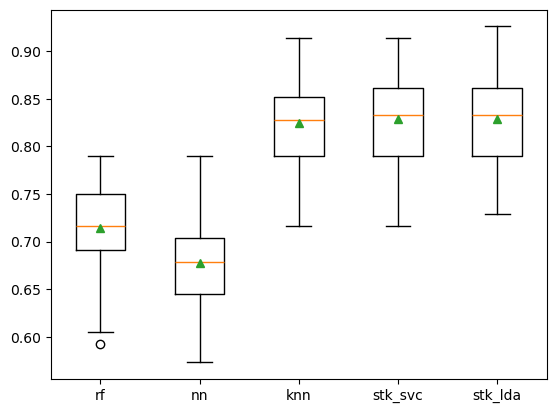

In [99]:
for name, model in models.items():
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

A box plot is created showing the distribution of model error scores. Here, we can see that the mean and median scores for both stacking models sit higher than other models, with KNN on par with stacking that used SVC as the final estimator.

Most of the models we used overfits the data. `we make a table for Training accuracy and testing accuracy`

In [152]:
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [154]:
models = {'rf': rf_best, 'knn': knn_1, 'stk_svc': stk_model_svc, 'stk_lda':stk_model_lda, 'dt': dtc_model_1}
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train_full_std, y_train_full)
 results.append(scores)
 names.append(name)

Iteration 1, loss = 0.99007883
Validation score: 0.630137
Iteration 2, loss = 0.83383942
Validation score: 0.650685
Iteration 3, loss = 0.77298632
Validation score: 0.643836
Iteration 4, loss = 0.72262690
Validation score: 0.643836
Iteration 5, loss = 0.69693442
Validation score: 0.650685
Iteration 6, loss = 0.67198585
Validation score: 0.657534
Iteration 7, loss = 0.64917793
Validation score: 0.636986
Iteration 8, loss = 0.63821000
Validation score: 0.684932
Iteration 9, loss = 0.62292631
Validation score: 0.671233
Iteration 10, loss = 0.60965120
Validation score: 0.712329
Iteration 1, loss = 1.06220884
Validation score: 0.595890
Iteration 11, loss = 0.59949682
Validation score: 0.698630
Iteration 2, loss = 0.84560450
Validation score: 0.678082
Iteration 12, loss = 0.58954454
Validation score: 0.705479
Iteration 3, loss = 0.77112272
Validation score: 0.698630
Iteration 13, loss = 0.57679301
Validation score: 0.684932
Iteration 4, loss = 0.74625827
Validation score: 0.657534
Iteration 

>rf 0.824 (0.047)
>knn 0.824 (0.047)
>stk_svc 0.824 (0.047)
>stk_lda 0.824 (0.047)
>dt 0.824 (0.047)


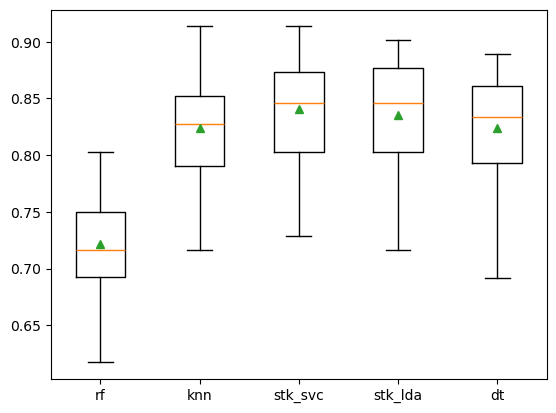

In [155]:
for name, model in models.items():
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Stacking SVC works better in the plot; which excludes NN Model

#### Feature Importance for the Tree Models that we utilized

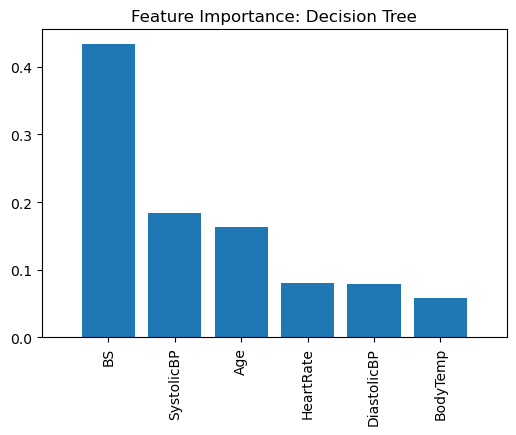

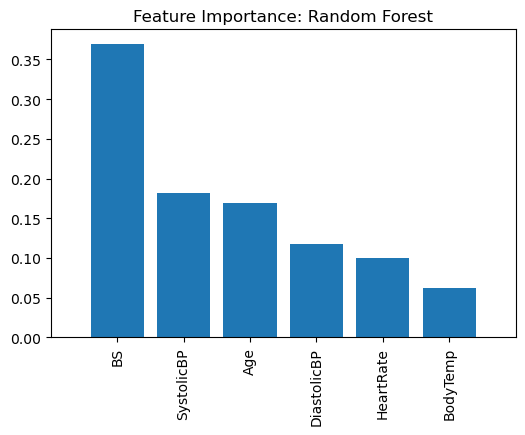

In [12]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Feature Importance for Tree-Based Models
for name in ['Decision Tree', 'Random Forest']:
    model = models[name]
    model.fit(X_train_full, y_train_full)  # Ensure model is fitted
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(6, 4))
    plt.title(f'Feature Importance: {name}')
    plt.bar(range(X_train_full.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train_full.shape[1]), [X_train_full.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()